In [1]:
%reset
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
from functions import loader, splt, fitter, stats, grouper
import matplotlib.pyplot as plt

savedir = "E01/"

In [3]:
all_data = loader.load_data()
data = loader.remove_duplicates( all_data,
    lambda d: ( d['dep_polymers'], d['side'], d['defects_frac'], d['gamma'] ),
    lambda d: d['runned_replicas']
)
len( data )

113

In [6]:
data[0]

{'side': 512,
 'defects_frac': 0.2,
 'gamma': 0.4,
 'chunk_size': 64,
 'tolerance': 0.01,
 'runned_replicas': 131072,
 'CF_Model': '',
 'dep_polymers': 'Squared',
 'save_path': '20220331LowResSquaredOrderedscan_20220409/f_0',
 'n_threads': '8',
 'draw': False,
 'occupation_average': 147700,
 'occupation_std': 417.68,
 'occupation_fraction_average': 0.563431,
 'occupation_fraction_std': 0.00159332,
 'pj_over_1_minus_q_avg': 0.704289,
 'pj_over_1_minus_q_std': 0.00199165,
 'occupation_history': [147588,
  147848,
  147604,
  148260,
  147504,
  148384,
  148700,
  148948,
  147952,
  147236,
  147732,
  147620,
  147932,
  146812,
  147736,
  147768,
  147436,
  148060,
  148472,
  147168,
  148268,
  147748,
  148744,
  147752,
  147168,
  147616,
  147268,
  147320,
  147892,
  147504,
  148232,
  147176,
  148652,
  147944,
  147696,
  147176,
  146712,
  147492,
  147840,
  147892,
  147260,
  147632,
  147600,
  147632,
  147400,
  147016,
  147276,
  147540,
  147044,
  147100,
  1

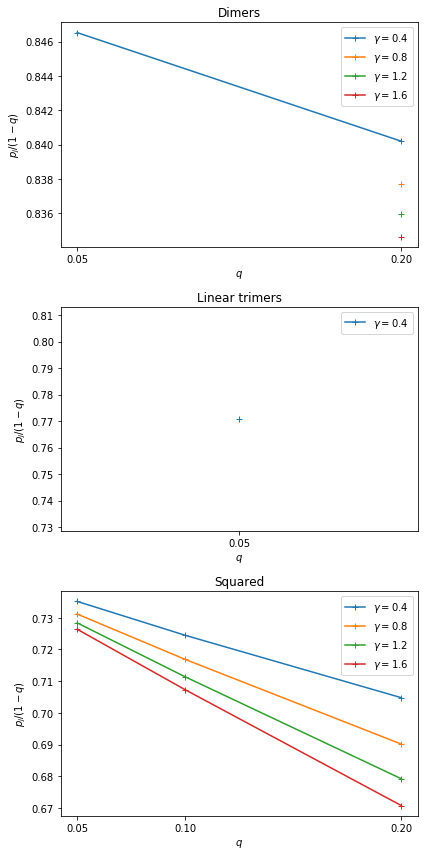

In [11]:
#TODO properly select side

filtered_data = data[ np.vectorize( lambda d: ( d['side'] == 1024 ) )(data) ]

splt.iterate(
    len( filtered_data ),
    lambda d: filtered_data[d]['dep_polymers'],
    lambda d: 0,
    lambda d: filtered_data[d]['gamma'],
    lambda d: filtered_data[d]['defects_frac'],
    lambda d: [
        filtered_data[d]['pj_over_1_minus_q_avg'],
    ],
    lambda r, c, l: [
        { 'label': fr"$\gamma = {l:.1f}$", 'ls': '-', 'marker': '+' }
    ],
    lambda r, c: (
        plt.title( fr"{r}" ),
        # plt.xscale( 'log', basex = 2 ),
        # plt.yscale( 'log', basey = 10 ),
        plt.xlabel( fr"$q$" ),
        # splt.hline( 0 ),
        plt.ylabel( fr"$p_j / ( 1 - q )$" )
    )
)

plt.tight_layout()
plt.savefig( savedir + "jamming.pdf" )